# Agglomerative clustering in action

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

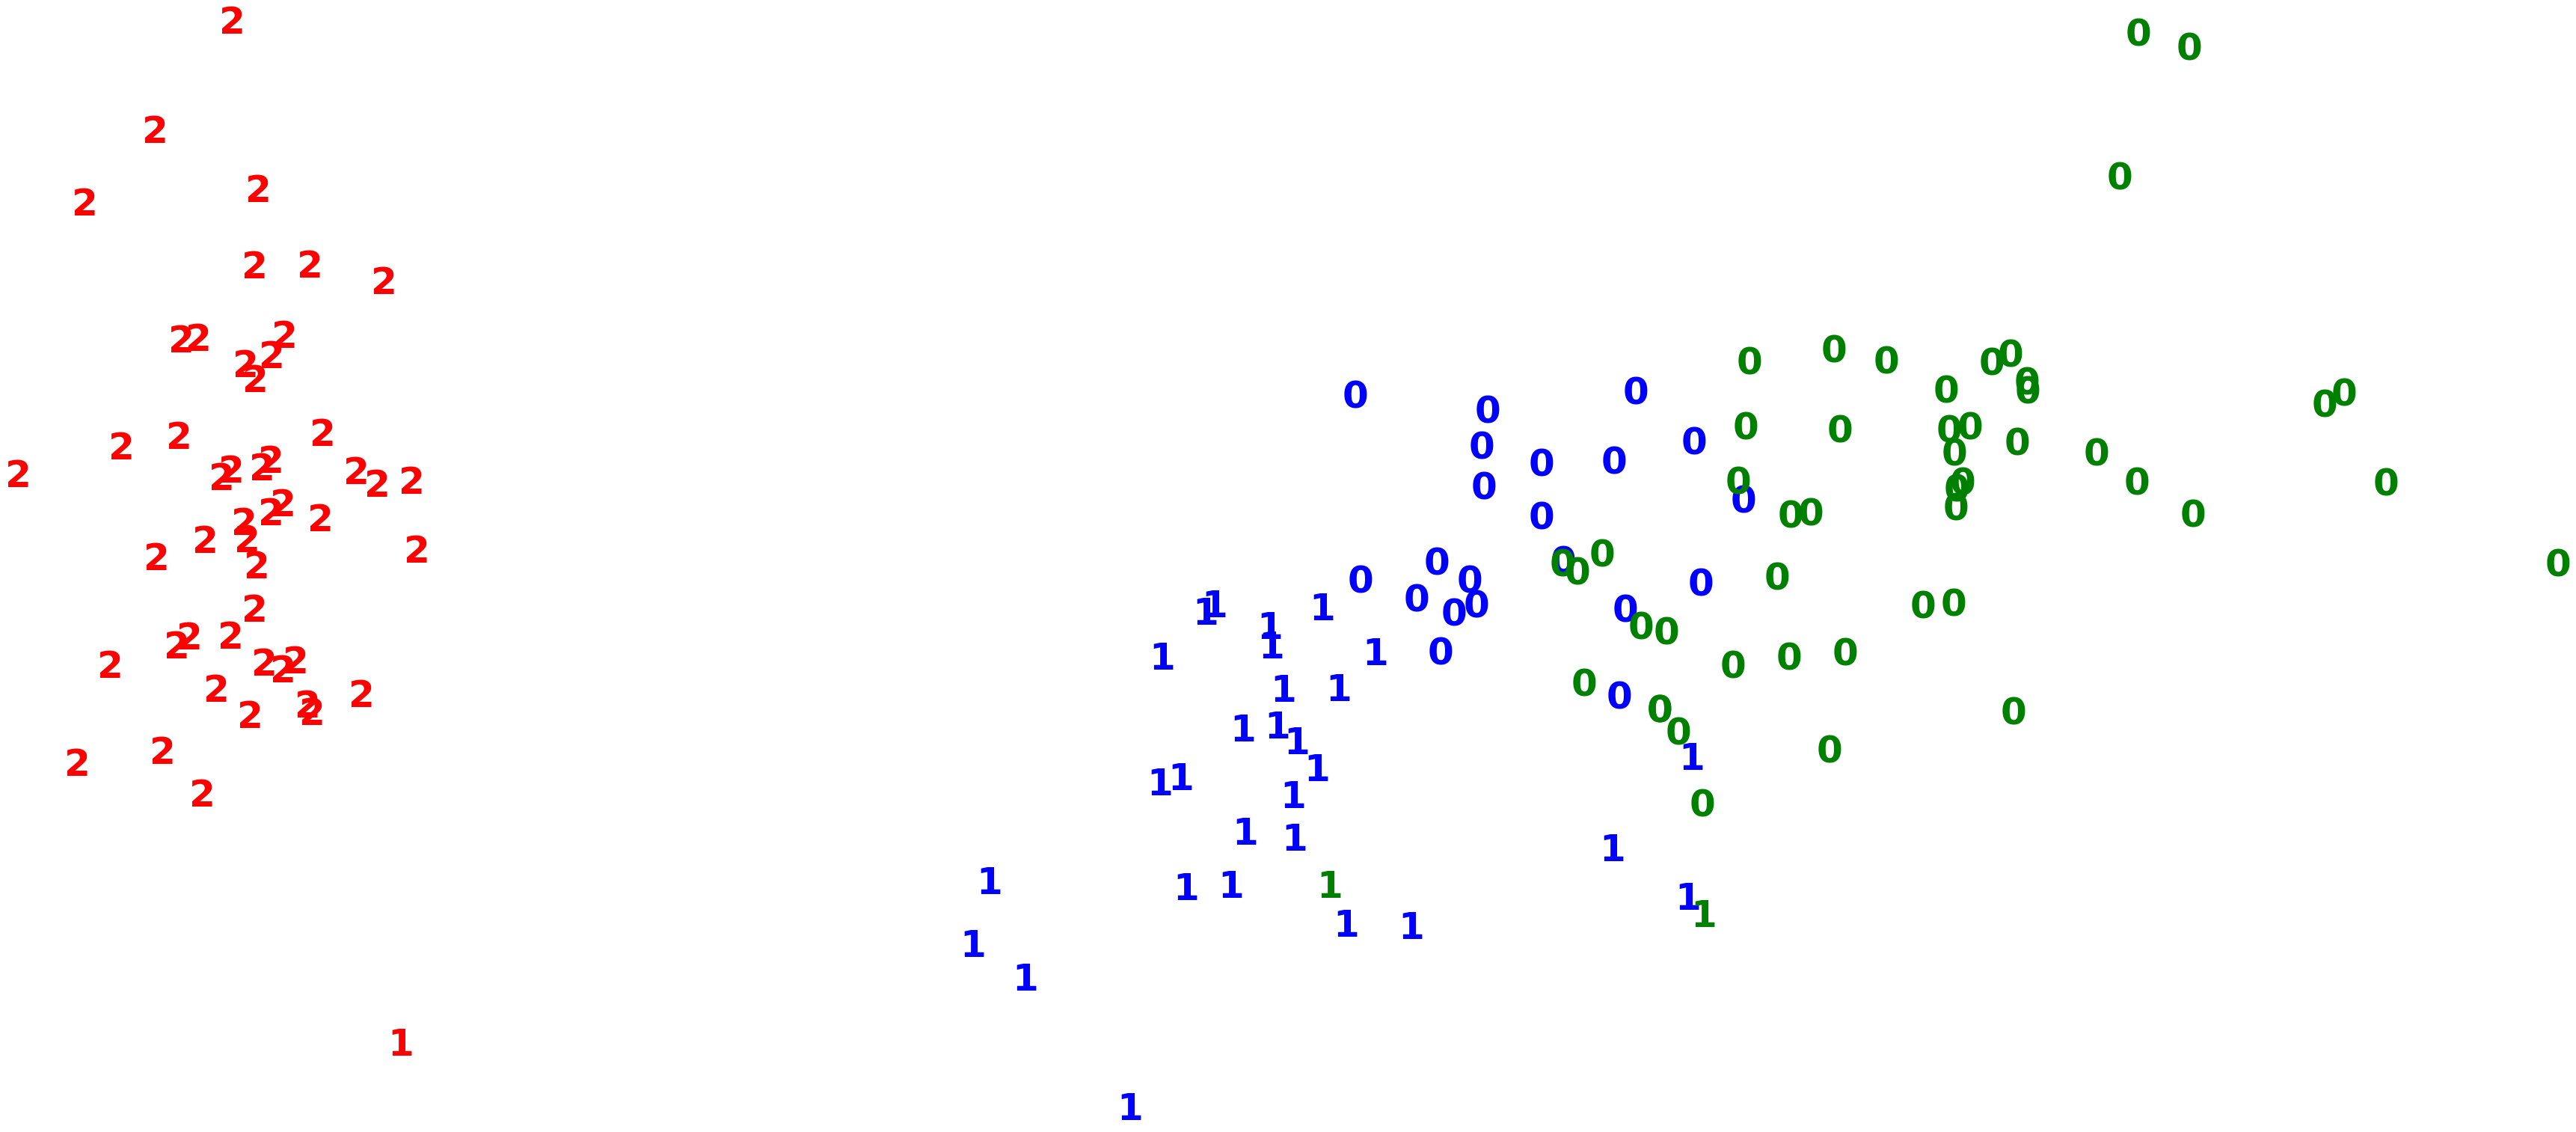

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [5]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.6334862915668319
The silhoutte score of the Agglomerative Clustering solution: 0.44662483949372017


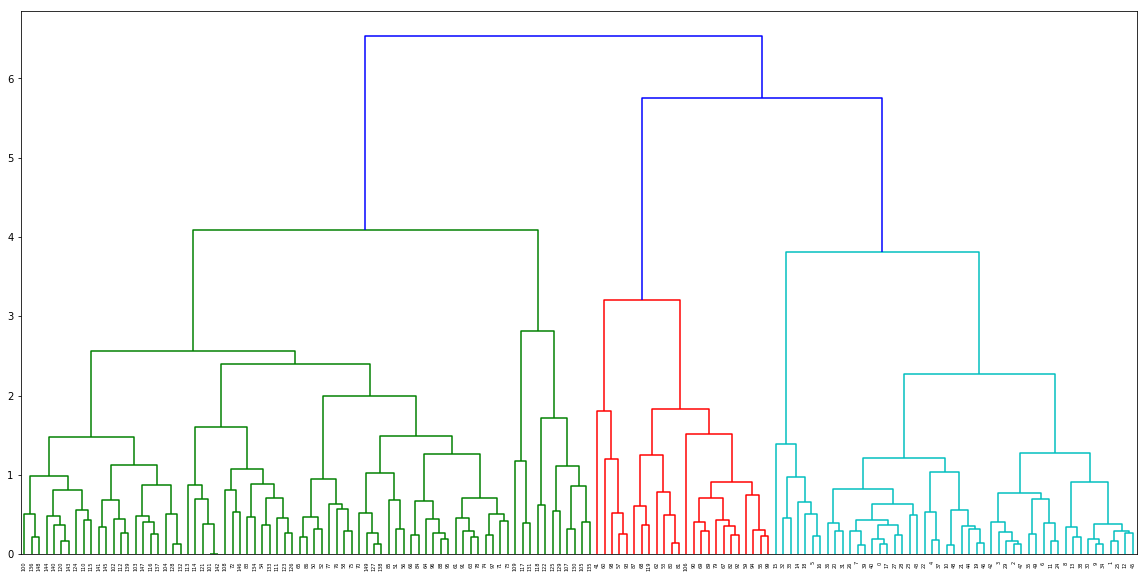

In [6]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

# Assignment

In [17]:
heartdisease_df = pd.read_csv('heart.csv')

In [18]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [19]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


__1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?__

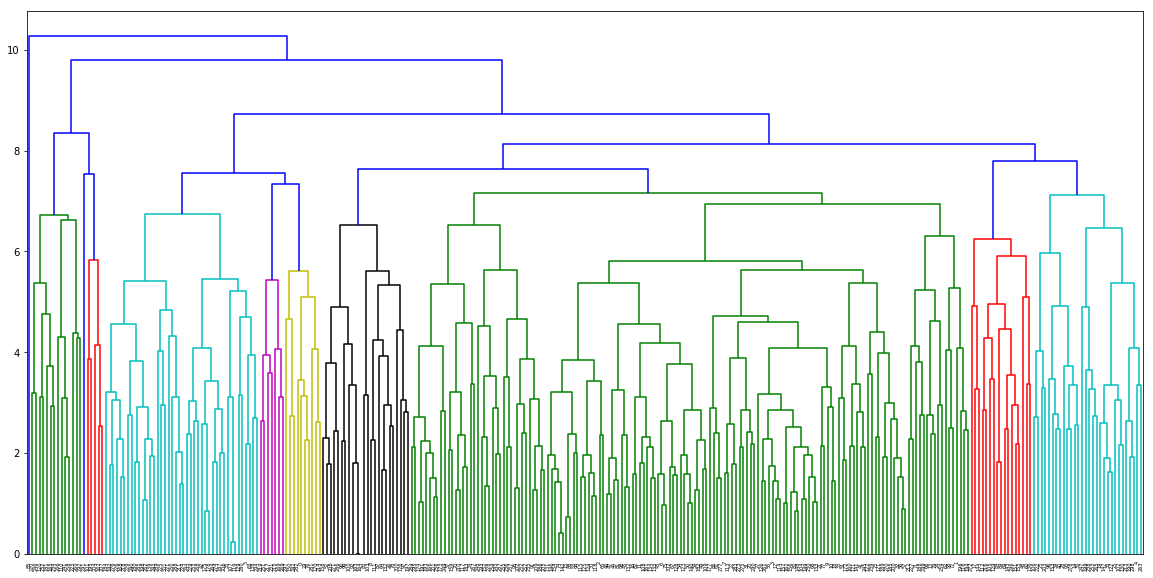

In [20]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

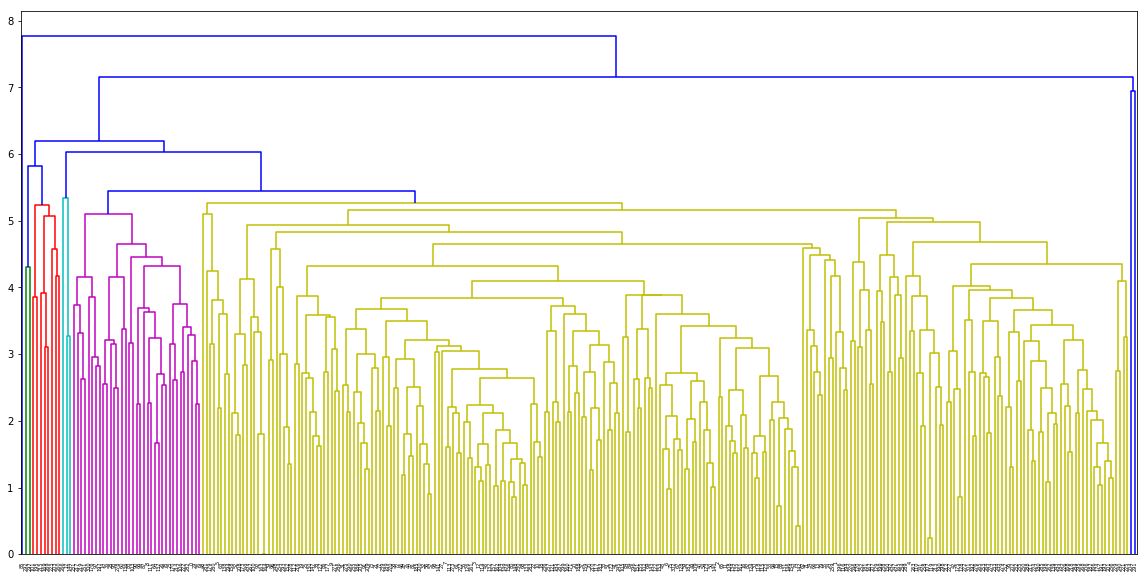

In [21]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

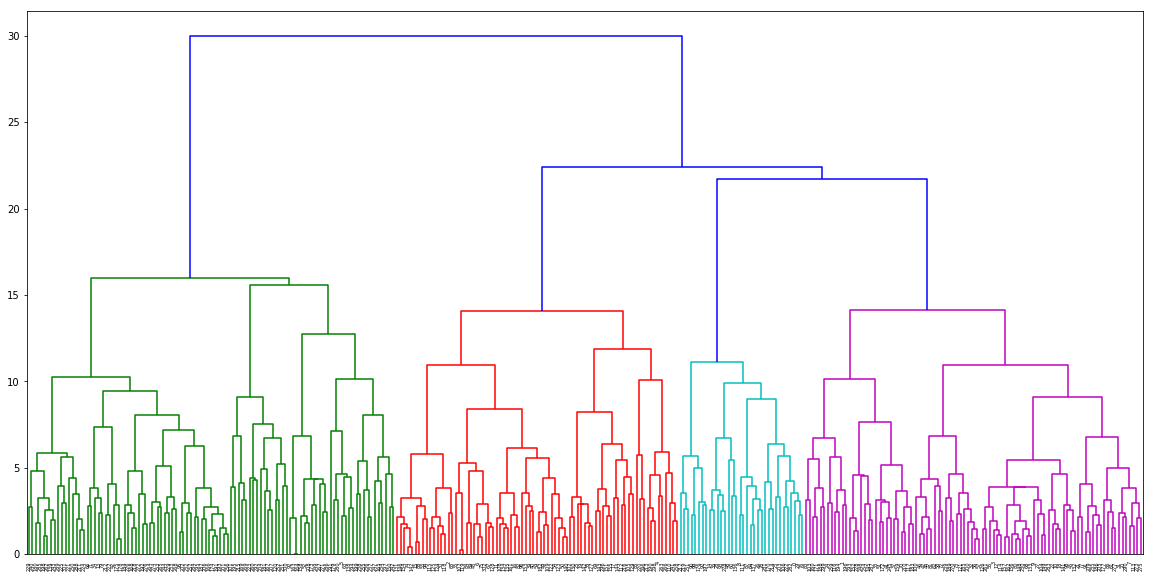

In [22]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

I think the best result is when we use ward linkage.

__2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?__

In [27]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='cosine')))
print("------------------------------------------------")

agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='cosine')))
print("------------------------------------------------")


agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")

ARI score of linkage method complete: 0.2457417084730023
Silhouette score of linkage method complete: 0.20239967890618074
------------------------------------------------
ARI score of linkage method average: 0.20782425775288046
Silhouette score of linkage method average: 0.20312403307835897
------------------------------------------------
ARI score of linkage method ward: 0.2454680392170414
Silhouette score of linkage method ward: 0.1325316617259095
------------------------------------------------


According to the results above, the best method is complete.